## Скејтовање на CartPole-у

> **Проблем**: Ако Петар жели да побегне од вука, мора да се креће брже од њега. Видећемо како Петар може да научи да скејтује, конкретно, да одржава равнотежу, користећи Q-Learning.

Прво, хајде да инсталирамо gym и увеземо потребне библиотеке:


In [1]:
#code block 1

## Направите окружење за колица и шипку


In [ ]:
#code block 2

Да бисмо видели како окружење функционише, хајде да покренемо кратку симулацију од 100 корака.


In [ ]:
#code block 3

Током симулације, потребно је добити опсервације како бисмо одлучили како да поступимо. У ствари, функција `step` нам враћа тренутне опсервације, функцију награде и заставицу `done` која указује да ли има смисла наставити симулацију или не:


In [ ]:
#code block 4

Можемо добити минималну и максималну вредност тих бројева:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Хајде да истражимо и друге методе дискретизације користећи бинове:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Хајде сада да покренемо кратку симулацију и посматрамо те дискретне вредности окружења.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Q-Table Структура


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


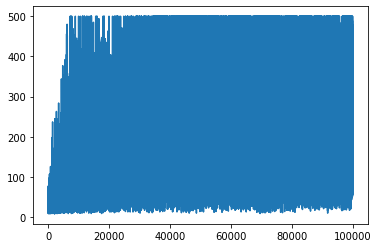

In [20]:
plt.plot(rewards)

Са овог графикона није могуће ништа закључити, јер због природе стохастичког процеса тренинга дужина сесија тренинга веома варира. Да би овај графикон имао више смисла, можемо израчунати **покретни просек** преко серије експеримената, рецимо 100. Ово се може лако урадити користећи `np.convolve`:


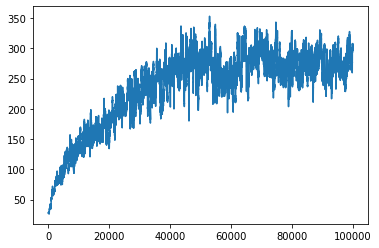

In [22]:
#code block 12

## Променљиви хиперпараметри и посматрање резултата у пракси

Сада би било занимљиво видети како се обучени модел заправо понаша. Покренимо симулацију, и пратићемо исту стратегију избора акција као током обуке: узорковање према расподели вероватноће у Q-табели:


In [23]:
# code block 13

## Чување резултата у анимираном GIF-у

Ако желите да импресионирате своје пријатеље, можда ћете желети да им пошаљете анимирану GIF слику балансирајуће шипке. Да бисте то урадили, можемо позвати `env.render` да произведемо слику кадра, а затим их сачувати као анимиран GIF користећи PIL библиотеку:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Одрицање од одговорности**:  
Овај документ је преведен коришћењем услуге за превођење помоћу вештачке интелигенције [Co-op Translator](https://github.com/Azure/co-op-translator). Иако се трудимо да превод буде тачан, молимо вас да имате у виду да аутоматизовани преводи могу садржати грешке или нетачности. Оригинални документ на његовом изворном језику треба сматрати меродавним извором. За критичне информације препоручује се професионални превод од стране људи. Не преузимамо одговорност за било каква погрешна тумачења или неспоразуме који могу настати услед коришћења овог превода.
